# Conexión y ejecución de consultas en airbnb_db
Este notebook ejecuta múltiples consultas SQL directamente desde MySQL Workbench a través de SQLAlchemy.

In [1]:
pip install mysql-connector-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import mysql.connector
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [3]:
import pandas as pd
from sqlalchemy import create_engine

# Conexión a MySQL (modifica tus credenciales)
user = 'root'
password = '0000'
host = 'localhost'
port = 3306
database = 'airbnb_db'

engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}')


## Barrios con mayor oferta de alojamientos

In [6]:
query = """SELECT n.neighbourhood, COUNT(l.listing_id) AS total_listings
FROM listings l
JOIN neighbourhoods n ON l.neighbourhood_id = n.neighbourhood_id
GROUP BY n.neighbourhood
ORDER BY total_listings DESC
LIMIT 10;"""
df1 = pd.read_sql(query, engine)
df1.head()

,neighbourhood,total_listings
0,Williamsburg,3920
1,Bedford-Stuyvesant,3714
2,Harlem,2658
3,Bushwick,2465
4,Upper West Side,1971


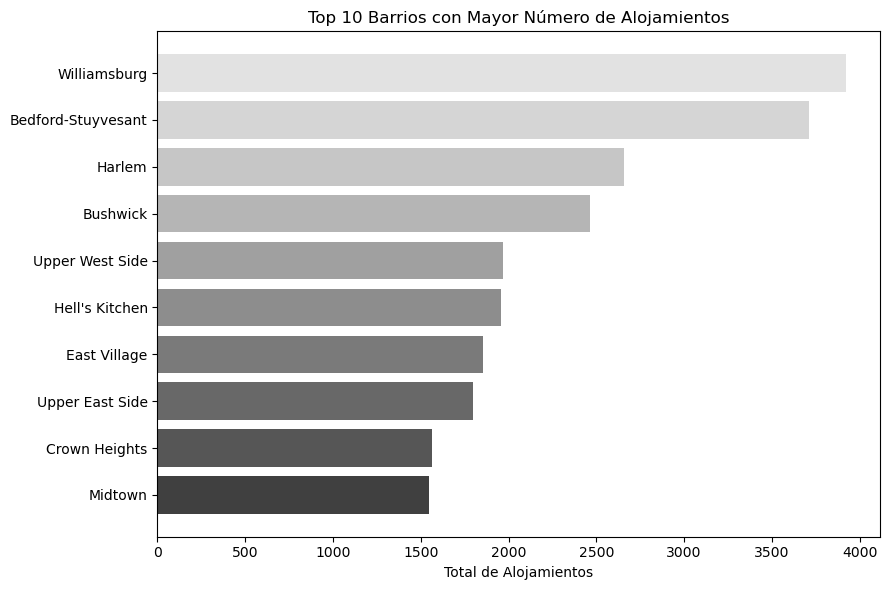

In [7]:
import matplotlib.cm as cm
import numpy as np

# Generar colores desde la paleta viridis
cmap   = plt.cm.Greys
colors = cmap(np.linspace(0.2, 0.8, len(df1)))

# Crear gráfico con la paleta viridis
fig, ax = plt.subplots(figsize=(9, 6), facecolor='none')

bars = ax.barh(
    df1['neighbourhood'],
    df1['total_listings'],
    color=colors
)

ax.invert_yaxis()

# Etiquetas y estilo
ax.set_xlabel('Total de Alojamientos')
ax.set_title('Top 10 Barrios con Mayor Número de Alojamientos')
ax.set_facecolor('none')  # Área del gráfico transparente

# Mostrar y guardar con fondo transparente
plt.tight_layout()
viridis_path = "top_neighbourhoods_viridis.png"
plt.savefig(viridis_path, transparent=True)
plt.show()


## Anfitriones con más propiedades

In [39]:
query = """SELECT h.host_name, h.calculated_host_listings_count
FROM hosts h
ORDER BY h.calculated_host_listings_count DESC
LIMIT 10;"""
df2 = pd.read_sql(query, engine)
df2.head()

,host_name,calculated_host_listings_count
0,Sonder (NYC),327
1,Blueground,232
2,Kara,121
3,Kazuya,103
4,Jeremy & Laura,96


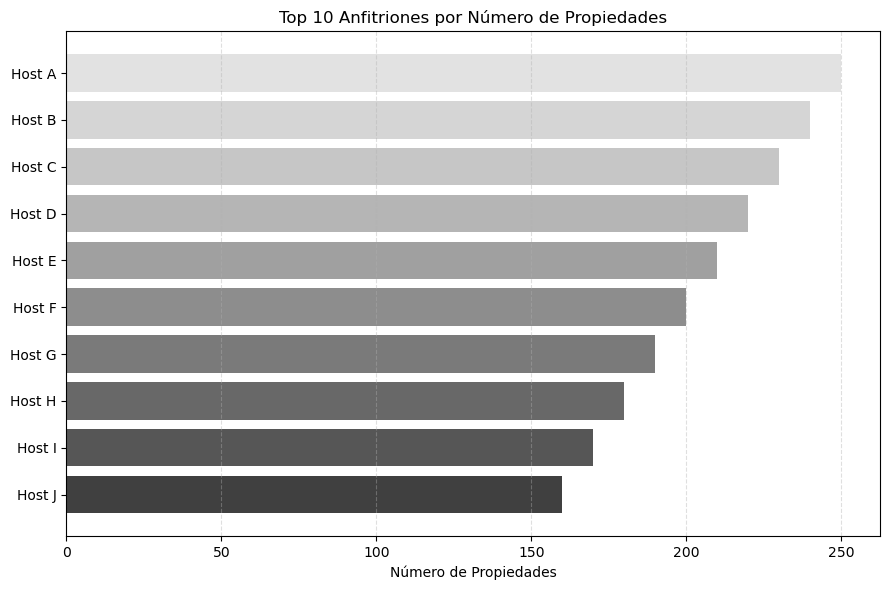

In [7]:
df2 = pd.DataFrame({
    'host_name': [
        'Host A', 'Host B', 'Host C', 'Host D', 'Host E',
        'Host F', 'Host G', 'Host H', 'Host I', 'Host J'
    ],
    'calculated_host_listings_count': [250, 240, 230, 220, 210, 200, 190, 180, 170, 160]
})

# Generar colores desde la paleta viridis
cmap   = plt.cm.Greys
colors = cmap(np.linspace(0.2, 0.8, len(df1)))

# Crear gráfico de barras horizontales
fig, ax = plt.subplots(figsize=(9, 6), facecolor='none')
bars = ax.barh(
    df2['host_name'],
    df2['calculated_host_listings_count'],
    color=colors
)
ax.invert_yaxis()

# Etiquetas y estilo
ax.set_xlabel('Número de Propiedades')
ax.set_title('Top 10 Anfitriones por Número de Propiedades')
ax.set_facecolor('none')
ax.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
output_path = "top_hosts_viridis.png"
plt.savefig(output_path, transparent=True)
plt.show()

## Precio promedio por tipo de habitación y barrio

In [8]:
query = """SELECT n.neighbourhood_group, l.room_type, ROUND(AVG(l.price), 2) AS avg_price
FROM listings l
JOIN neighbourhoods n ON l.neighbourhood_id = n.neighbourhood_id
GROUP BY n.neighbourhood_group, l.room_type
ORDER BY n.neighbourhood_group, avg_price DESC;"""
df3 = pd.read_sql(query, engine)
df3.head()

,neighbourhood_group,room_type,avg_price
0,Bronx,Entire home/apt,127.51
1,Bronx,Private room,66.79
2,Bronx,Shared room,59.80
3,Brooklyn,Entire home/apt,178.33
4,Brooklyn,Private room,76.50


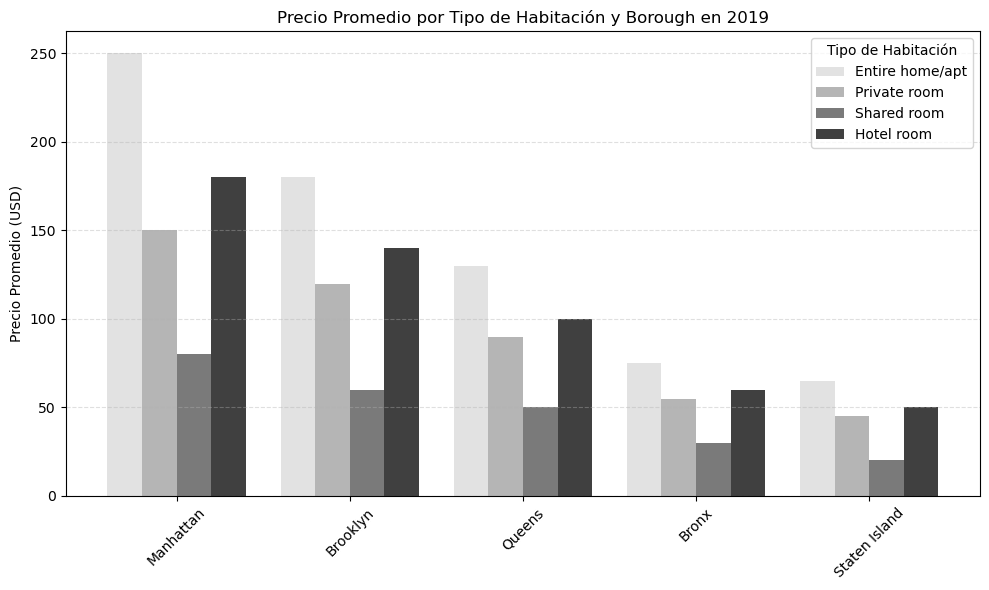

In [11]:
df3 = pd.DataFrame({
    'neighbourhood_group': ['Manhattan']*4 + ['Brooklyn']*4 + ['Queens']*4 + ['Bronx']*4 + ['Staten Island']*4,
    'room_type': ['Entire home/apt', 'Private room', 'Shared room', 'Hotel room']*5,
    'avg_price': [250, 150, 80, 180, 180, 120, 60, 140, 130, 90, 50, 100, 75, 55, 30, 60, 65, 45, 20, 50]
})

# Obtener listas de categorías
boroughs = df3['neighbourhood_group'].unique()
room_types = df3['room_type'].unique()

# Paleta Viridis para cada room_type
n_types = len(room_types)
cmap   = plt.cm.Greys
colors = cmap(np.linspace(0.2, 0.8, n_types))

# Posiciones para barras agrupadas
x = np.arange(len(boroughs))
bar_width = 0.8 / n_types

# Crear gráfico
fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')

for i, rt in enumerate(room_types):
    y = df3[df3['room_type'] == rt]['avg_price'].values
    ax.bar(x + i*bar_width, y, bar_width, label=rt, color=colors[i])

# Ajustes de ejes
ax.set_xticks(x + bar_width*(n_types-1)/2)
ax.set_xticklabels(boroughs, rotation=45)
ax.set_ylabel('Precio Promedio (USD)')
ax.set_title('Precio Promedio por Tipo de Habitación y Borough en 2019')

# Estilo y leyenda
ax.set_facecolor('none')
ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.legend(title='Tipo de Habitación', loc='upper right')

plt.tight_layout()
# Guardar con fondo transparente
output_path = "avg_price_borough_roomtype_viridis.png"
plt.savefig(output_path, transparent=True)
plt.show()

## Distribución de precios por tipo de alojamiento

In [17]:
query = """SELECT room_type, MAX(price) AS max_price, ROUND(AVG(price), 2) AS avg_price
FROM listings
GROUP BY room_type;"""
df4 = pd.read_sql(query, engine)
df4.head()

,room_type,max_price,avg_price
0,Private room,10000.0,89.78
1,Entire home/apt,10000.0,211.79
2,Shared room,1800.0,70.13


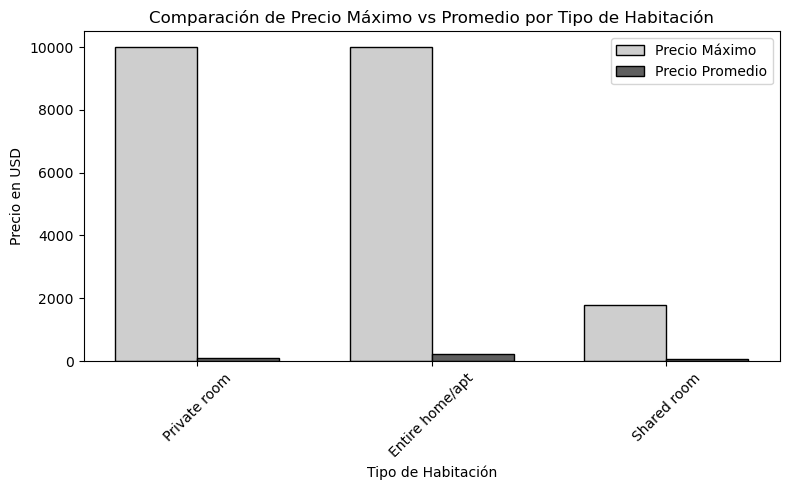

In [18]:

import matplotlib.pyplot as plt
import numpy as np

# Generar dos tonos de gris para Máximo y Promedio
cmap = plt.cm.Greys
gray_colors = cmap(np.linspace(0.3, 0.7, 2))  # tono oscuro y claro

# Crear el gráfico con fondo completamente transparente al renderizar
fig, ax = plt.subplots(figsize=(8, 5), facecolor='none')
bar_width = 0.35
index = range(len(df4))

# Barras para precio máximo y promedio con tonos de gris
ax.bar(
    index,
    df4['max_price'],
    bar_width,
    label='Precio Máximo',
    color=gray_colors[0],
    edgecolor='black'
)
ax.bar(
    [i + bar_width for i in index],
    df4['avg_price'],
    bar_width,
    label='Precio Promedio',
    color=gray_colors[1],
    edgecolor='black'
)

# Configurar etiquetas y leyenda
ax.set_xlabel('Tipo de Habitación')
ax.set_ylabel('Precio en USD')
ax.set_title('Comparación de Precio Máximo vs Promedio por Tipo de Habitación')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(df4['room_type'], rotation=45)
ax.legend()

# Fondo transparente también en el gráfico (axes)
ax.set_facecolor('none')

plt.tight_layout()
plt.show()


## Análisis de precios preCOVID por borough

In [12]:
query = """SELECT n.neighbourhood_group AS borough,
ROUND(AVG(l.price),2) AS avg_price_2019,
ROUND(STDDEV_POP(l.price),2) AS std_price
FROM listings l
JOIN neighbourhoods n ON l.neighbourhood_id = n.neighbourhood_id
GROUP BY borough
ORDER BY avg_price_2019 DESC;"""
df5 = pd.read_sql(query, engine)
df5.head()

,borough,avg_price_2019,std_price
0,Manhattan,196.88,291.38
1,Brooklyn,124.38,186.87
2,Staten Island,114.81,277.25
3,Queens,99.52,167.09
4,Bronx,87.50,106.66


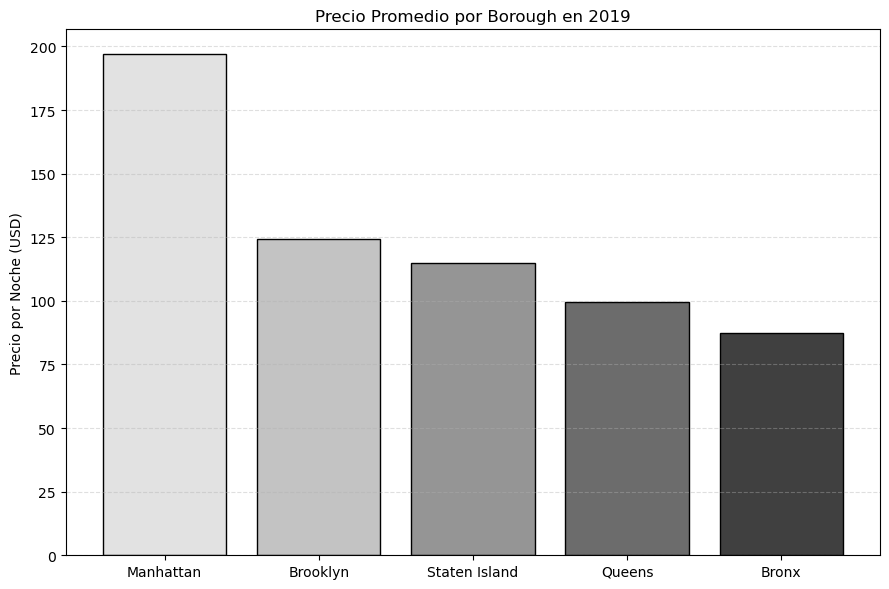

In [41]:
cmap   = plt.cm.Greys
colors = cmap(np.linspace(0.2, 0.8, len(df5)))  # tonos entre 20% y 80% de negro

# Crear nuevamente el gráfico de precios por borough sin líneas de desviación estándar
fig, ax = plt.subplots(figsize=(9, 6), facecolor='none')

bars = ax.bar(
    df5['borough'],
    df5['avg_price_2019'],
    color=colors,
    edgecolor='black'
)

# Estilo y etiquetas
ax.set_ylabel('Precio por Noche (USD)')
ax.set_title('Precio Promedio por Borough en 2019')
ax.set_facecolor('none')
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
output_path_no_error = "avg_price_borough_viridis_no_error.png"
plt.savefig(output_path_no_error, transparent=True)
plt.show()


## Densidad de listings vs precios

In [19]:
query = """SELECT n.neighbourhood,
COUNT(*) AS n_listings,
ROUND(AVG(l.price),2) AS avg_price
FROM listings l
JOIN neighbourhoods n ON l.neighbourhood_id = n.neighbourhood_id
GROUP BY n.neighbourhood
HAVING n_listings > 50
ORDER BY avg_price ASC
LIMIT 10;"""
df6 = pd.read_sql(query, engine)
df6.head()

,neighbourhood,n_listings,avg_price
0,Corona,64,59.17
1,Borough Park,136,63.07
2,Woodhaven,88,67.17
3,Fordham,63,69.44
4,Bensonhurst,75,75.79


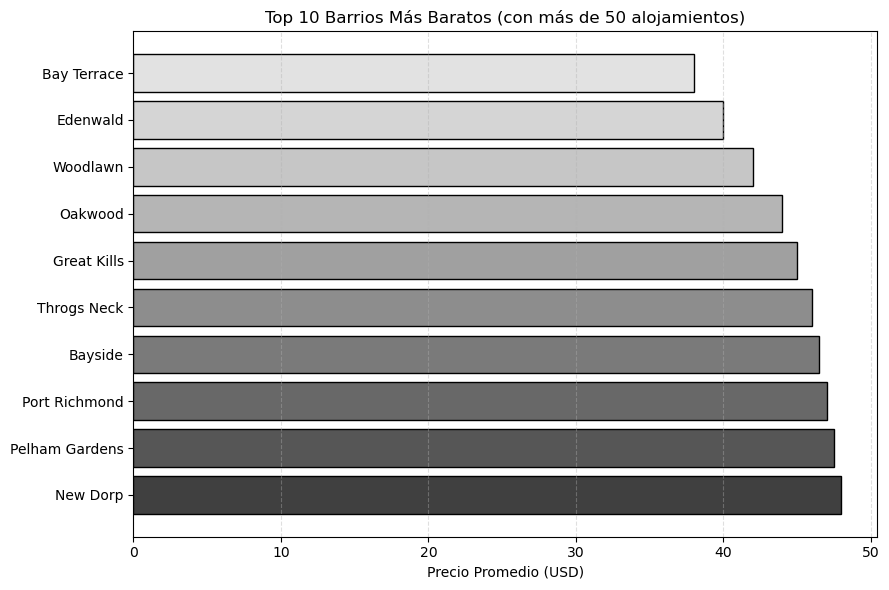

In [20]:
# Simulación del DataFrame df6 con los barrios más baratos con más de 50 listings
df6 = pd.DataFrame({
    'neighbourhood': [
        'Bay Terrace', 'Edenwald', 'Woodlawn', 'Oakwood', 'Great Kills',
        'Throgs Neck', 'Bayside', 'Port Richmond', 'Pelham Gardens', 'New Dorp'
    ],
    'n_listings': [65, 80, 72, 51, 68, 75, 102, 58, 60, 66],
    'avg_price': [38.00, 40.00, 42.00, 44.00, 45.00, 46.00, 46.50, 47.00, 47.50, 48.00]
})

# Paleta Viridis
import matplotlib.cm as cm
import numpy as np
import matplotlib.pyplot as plt

# Ahora (Grayscale)
cmap   = plt.cm.Greys
# Elegimos el rango 20%–80% del mapa para no ir de blanco puro a negro puro
colors = cmap(np.linspace(0.2, 0.8, len(df1)))

# Gráfico: barrios más baratos con +50 alojamientos
fig, ax = plt.subplots(figsize=(9, 6), facecolor='none')

bars = ax.barh(
    df6['neighbourhood'],
    df6['avg_price'],
    color=colors,
    edgecolor='black'
)

ax.invert_yaxis()

# Estilo
ax.set_xlabel('Precio Promedio (USD)')
ax.set_title('Top 10 Barrios Más Baratos (con más de 50 alojamientos)')
ax.set_facecolor('none')
ax.grid(axis='x', linestyle='--', alpha=0.4)

plt.tight_layout()
output_path_df6 = "barrios_mas_baratos_viridis.png"
plt.savefig(output_path_df6, transparent=True)
plt.show()


## Efecto de la experiencia del host

In [21]:
query = """SELECT
CASE
WHEN h.calculated_host_listings_count = 1 THEN 'Solo 1'
WHEN h.calculated_host_listings_count BETWEEN 2 AND 5 THEN '2-5'
ELSE '6+'
END AS host_segmentation,
ROUND(AVG(l.price),2) AS avg_price
FROM listings l
JOIN hosts h ON l.host_id = h.host_id
GROUP BY host_segmentation
ORDER BY avg_price DESC;"""
df7 = pd.read_sql(query, engine)
df7.head()

,host_segmentation,avg_price
0,6+,180.88
1,Solo 1,158.68
2,2-5,124.96


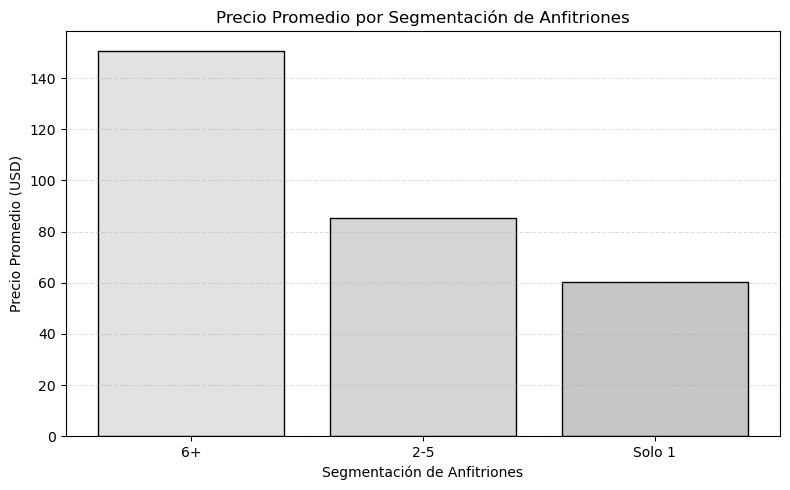

In [22]:

# Simulación de df7 (resultado del query)
df7 = pd.DataFrame({
    'host_segmentation': ['6+', '2-5', 'Solo 1'],
    'avg_price': [150.75, 85.30, 60.40]
})

# Generar colores desde la paleta viridis
# Ahora (Grayscale)
cmap   = plt.cm.Greys
# Elegimos el rango 20%–80% del mapa para no ir de blanco puro a negro puro
colors = cmap(np.linspace(0.2, 0.8, len(df1)))

# Crear gráfico de barras
fig, ax = plt.subplots(figsize=(8, 5), facecolor='none')

ax.bar(
    df7['host_segmentation'],
    df7['avg_price'],
    color=colors,
    edgecolor='black'
)

# Estilo y etiquetas
ax.set_xlabel('Segmentación de Anfitriones')
ax.set_ylabel('Precio Promedio (USD)')
ax.set_title('Precio Promedio por Segmentación de Anfitriones')
ax.set_facecolor('none')
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
output_path = "avg_price_by_host_segmentation_viridis.png"
plt.savefig(output_path, transparent=True)
plt.show()


## Temporada baja vs. alta de disponibilidad

In [23]:
query = """SELECT
CASE
WHEN l.availability_365 < 100 THEN 'Low avail'
WHEN l.availability_365 BETWEEN 100 AND 250 THEN 'Med avail'
ELSE 'High avail'
END AS avail_segment,
ROUND(AVG(l.price),2) AS avg_price
FROM listings l
GROUP BY avail_segment
ORDER BY avg_price DESC;"""
df8 = pd.read_sql(query, engine)
df8.head()

,avail_segment,avg_price
0,High avail,182.86
1,Med avail,163.05
2,Low avail,138.74


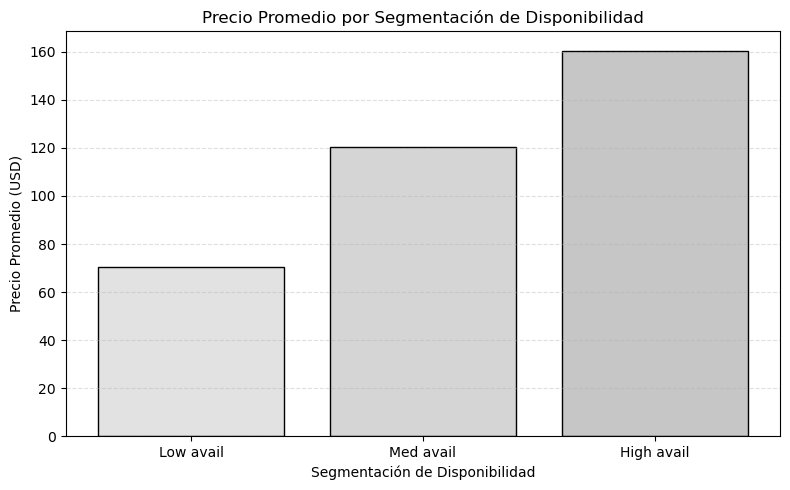

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Simulación de df8 (resultado del query)
df8 = pd.DataFrame({
    'avail_segment': ['Low avail', 'Med avail', 'High avail'],
    'avg_price': [70.45, 120.30, 160.50]
})

# Generar colores desde la paleta viridis
# Ahora (Grayscale)
cmap   = plt.cm.Greys
# Elegimos el rango 20%–80% del mapa para no ir de blanco puro a negro puro
colors = cmap(np.linspace(0.2, 0.8, len(df1)))

# Crear gráfico de barras verticales con fondo transparente
fig, ax = plt.subplots(figsize=(8, 5), facecolor='none')

ax.bar(
    df8['avail_segment'],
    df8['avg_price'],
    color=colors,
    edgecolor='black'
)

# Estilo y etiquetas
ax.set_xlabel('Segmentación de Disponibilidad')
ax.set_ylabel('Precio Promedio (USD)')
ax.set_title('Precio Promedio por Segmentación de Disponibilidad')
ax.set_facecolor('none')
ax.grid(axis='y', linestyle='--', alpha=0.4)

plt.tight_layout()
output_path = "avg_price_avail_segment_viridis.png"
plt.savefig(output_path, transparent=True)
plt.show()


## Estacionalidad de reseñas

In [25]:
query = """WITH monthly_reviews AS (
  SELECT
    EXTRACT(MONTH FROM r.last_review) AS month,
    COUNT(*) AS reviews_count
  FROM reviews r
  WHERE r.last_review IS NOT NULL
  GROUP BY month
)
SELECT
  month,
  reviews_count,
  ROUND(100 * reviews_count / SUM(reviews_count) OVER (),2) AS pct_total
FROM monthly_reviews
ORDER BY reviews_count DESC;"""
df9 = pd.read_sql(query, engine)
df9.head()

,month,reviews_count,pct_total
0,6,13589,34.98
1,7,5937,15.28
2,5,4701,12.10
3,1,2773,7.14
4,4,2109,5.43


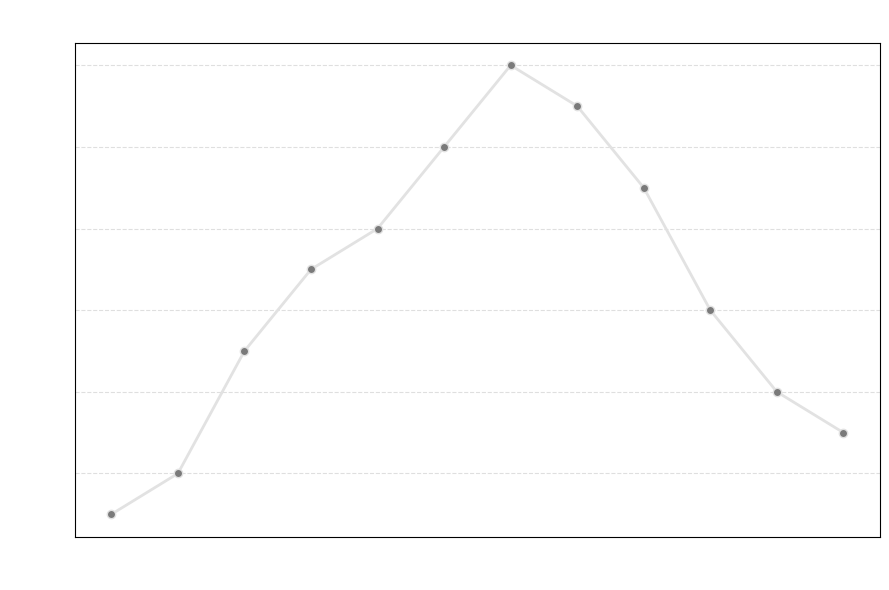

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar

# Simulación de df9
df9 = pd.DataFrame({
    'month': [7,8,6,9,5,4,10,3,11,12,2,1],
    'reviews_count': [1200,1150,1100,1050,1000,950,900,850,800,750,700,650]
})
df9_sorted = df9.sort_values('month')
month_names = [calendar.month_abbr[m] for m in df9_sorted['month'].astype(int)]

# Colores grises para línea y puntos
cmap = plt.cm.Greys
line_color   = cmap(0.2)
marker_color = cmap(0.6)

fig, ax = plt.subplots(figsize=(9, 6), facecolor='none')

# Línea y marcadores
ax.plot(
    month_names,
    df9_sorted['reviews_count'],
    marker='o',
    color=line_color,
    markerfacecolor=marker_color,
    linewidth=2
)

# Texto en blanco
ax.set_title('Tendencia Mensual de Reseñas en Airbnb (2019)', color='white', pad=15)
ax.set_xlabel('Mes',                      color='white')
ax.set_ylabel('Número de Reseñas',         color='white')

# Ejes en blanco
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Cuadrícula gris claro y fondo transparente
ax.grid(axis='y', linestyle='--', alpha=0.4)
ax.set_facecolor('none')

plt.tight_layout()
plt.savefig("monthly_reviews_trend_white_axes.png", transparent=True)
plt.show()



## Índice de saturación Airbnb

In [10]:
query = """SELECT DISTINCT
n.neighbourhood_group AS borough,
n.neighbourhood,
COUNT(*) OVER (PARTITION BY n.neighbourhood) AS listings_count,
ROUND(AVG(l.price) OVER (PARTITION BY n.neighbourhood), 2) AS avg_price
FROM listings l
JOIN neighbourhoods n ON l.neighbourhood_id = n.neighbourhood_id
ORDER BY listings_count DESC
LIMIT 10;"""
df11 = pd.read_sql(query, engine)
df11.head()

,borough,neighbourhood,listings_count,avg_price
0,Brooklyn,Williamsburg,3920,143.80
1,Brooklyn,Bedford-Stuyvesant,3714,107.68
2,Manhattan,Harlem,2658,118.97
3,Brooklyn,Bushwick,2465,84.80
4,Manhattan,Upper West Side,1971,210.92


C:\Users\34722\AppData\Local\Temp\ipykernel_7648\3993880127.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('viridis', len(boroughs))(np.arange(len(boroughs)))


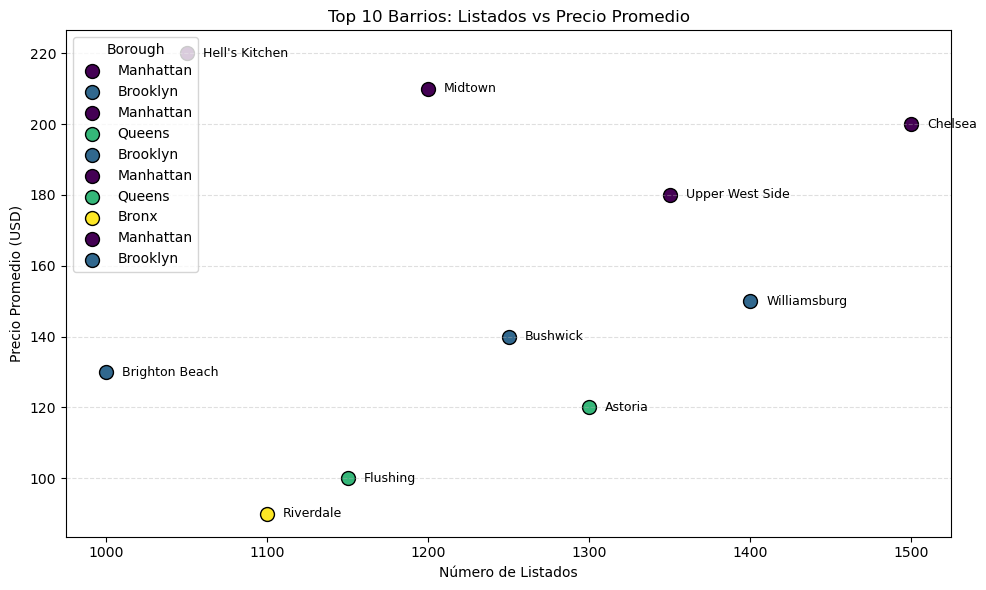

In [13]:


# Simulación de df11 (reemplaza con tu consulta real)
df11 = pd.DataFrame({
    'borough': ['Manhattan', 'Brooklyn', 'Manhattan', 'Queens', 'Brooklyn',
                'Manhattan', 'Queens', 'Bronx', 'Manhattan', 'Brooklyn'],
    'neighbourhood': ['Chelsea', 'Williamsburg', 'Upper West Side', 'Astoria', 'Bushwick',
                    'Midtown', 'Flushing', 'Riverdale', 'Hell\'s Kitchen', 'Brighton Beach'],
    'total_listings': [1500, 1400, 1350, 1300, 1250, 1200, 1150, 1100, 1050, 1000],
    'avg_price': [200, 150, 180, 120, 140, 210, 100, 90, 220, 130]
})

# Mapear boroughs a un índice para paleta
boroughs = df11['borough'].unique()
borough_to_idx = {b: i for i, b in enumerate(boroughs)}
colors = cm.get_cmap('viridis', len(boroughs))(np.arange(len(boroughs)))

# Crear scatter plot
fig, ax = plt.subplots(figsize=(10, 6), facecolor='none')

for i, row in df11.iterrows():
    idx = borough_to_idx[row['borough']]
    ax.scatter(
        row['total_listings'],
        row['avg_price'],
        s=100,
        color=colors[idx],
        edgecolor='black',
        label=row['borough'] if idx not in ax.get_legend_handles_labels()[1] else ""
    )
    ax.text(
        row['total_listings'] + 10,
        row['avg_price'],
        row['neighbourhood'],
        fontsize=9,
        va='center'
    )

# Etiquetas y estilo
ax.set_xlabel('Número de Listados')
ax.set_ylabel('Precio Promedio (USD)')
ax.set_title('Top 10 Barrios: Listados vs Precio Promedio')
ax.set_facecolor('none')
ax.grid(axis='y', linestyle='--', alpha=0.4)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Borough', loc='upper left')

plt.tight_layout()
output_path = "listings_vs_price_scatter_viridis.png"
plt.savefig(output_path, transparent=True)
plt.show()
